In [1]:
import cv2
import  numpy as np
import matplotlib.pyplot as plt

" cv2.imshow('Image',color_img)\ncv2.waitKey(0)\ncv2.destroyAllWindows() "

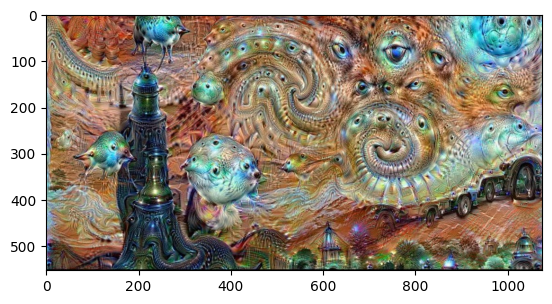

In [71]:
#Read the image as greyscale
img = cv2.imread('AI_image.jpg',cv2.IMREAD_GRAYSCALE)
color_img = cv2.imread('AI_image.jpg',cv2.IMREAD_COLOR)

#openCV work on BGR while JPG channels are ordered RGB so we revert the channels back
#color_img = cv2.cvtColor(color_img,cv2.COLOR_BGR2RGB)
#can also do IMREAD_COLOR, IMREAD_UNCHANGED
plt.imshow(color_img)
# We can also show the image use opencv
""" cv2.imshow('Image',color_img)
cv2.waitKey(0)
cv2.destroyAllWindows() """

In [22]:
# Drawing & Writing on Images

#Resizing images in OpenCV
reduced_height, reduced_width = 500,500
resized_image = cv2.resize(color_img,(reduced_height,reduced_width),interpolation = cv2.INTER_LINEAR)

#Drawing a line on image from location (0,0) to (150,150) of colour Green (B,G,R) and line size
cv2.line(resized_image, (0,0), (150,150),(0,255,0),15) 

#Drawing a rectangle 
cv2.rectangle(resized_image, (15,20), (300,150),(255,0,0), 5) 

# Draw a circle centred at (100,50) of radius 25 and color white and the last parameter specifies the line width. Giving it a -1 fills the whole shape
cv2.circle(resized_image,(100,50),25,(0,0,0),-1) 

#Draw a polygon of n points as an array.
pts = np.array([(100,200),(200,200),(100,300)],np.int32)
#True represent whether we want the last point to be connected to the first point - if false it will a open shape. Points of a polygon are only taken as an array
cv2.polylines(resized_image,[pts],True, (0,0,255),15)

#Writing on an Image - 1 is the font size and 2 is thickness
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(resized_image, "Hello world", (175,350), font, 1, (0,0,0), 2, cv2.LINE_AA)


cv2.imshow('image',resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
#Region of image - a neighbourhood of pixels from an image
roi = color_img[100:300,500:600]

""" # Only one channel for a greyscale image
img[100:150,100:150] =255

#3 channels to be specified for a colour image
color_img[100:150,100:150] = [255,255,255]
cv2.imshow("ROI",img)
cv2.waitKey(0)
cv2.destroyAllWindows() 
 """
#Addition of images
#cv2.add(img1,img2) => add corresponding pixels from each image => results in a very white image
#cv2.addWeighted(img1,0.6,img2,0.4,0) => Weighted Addition
#We can also do a normal add = img1+img2 => this is not same as cv2.add(img1,img2)

In [88]:
img1 = cv2.resize(color_img,(500,500),interpolation = cv2.INTER_LINEAR)
cv2.imshow("image1", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

img2 = cv2.imread('OpenCVLogo.jpg',cv2.IMREAD_COLOR)
#Resizing the image2
img2 = cv2.resize(img2,(150,100),interpolation = cv2.INTER_LINEAR)
cv2.imshow("image2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Convert the colour image2 (logo) to grayscale only one channel of 0 to 255
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2.imshow('Greyscale image', img2gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Create a mask that thresholds all the value above 220 to 255 and then inverts all the pixels
# 0 ----> 255 and 255  ----> 0 (cv2.THRESH_BINARY_INV does that) Thus all black areas become white and white areas become black
ret,mask = cv2.threshold(img2gray,220,255,cv2.THRESH_BINARY_INV)
cv2.imshow('Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Invert the mask -- bitwise NOT functions similar to the logical NOT operation by inverting all bits
mask_inv = cv2.bitwise_not(mask)
cv2.imshow('Inverted Mask', mask_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

rows,cols,channels = img2.shape
#Now black out the area of logo in the image1
roi = img1[0:rows,0:cols]
img1_bg = cv2.bitwise_and(roi,roi,mask= mask_inv)
cv2.imshow("Background",img1_bg)
cv2.waitKey(0)
cv2.destroyAllWindows() 
#Now take the region needed from image2
img2_fg = cv2.bitwise_and(img2,img2,mask=mask)
cv2.imshow("Foreground", img2_fg)
cv2.waitKey(0)
cv2.destroyAllWindows()

dst = cv2.add(img1_bg,img2_fg)
img1[0:rows,0:cols] = dst
cv2.imshow("Final Image", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [117]:
#Thresholding with OpenCV
dark_image = cv2.imread('Thresholding_dark_image.jpg',cv2.IMREAD_COLOR)

#Converting a color image to Grayscale Image
greyscale_image = cv2.cvtColor(dark_image,cv2.COLOR_BGR2GRAY)

#Dsiplaying both these images
""" cv2.imshow("Original Image", dark_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow("Greyscale Image", greyscale_image)
cv2.waitKey(0)
cv2.destroyAllWindows() """

#Thresholding in a color image - 

color_retval,color_threshold = cv2.threshold(dark_image,50,255,cv2.THRESH_BINARY)
""" cv2.imshow("Color Threshold Image", color_threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()
 """

#Thresholding in a greyscale image
# In a simple THRESH_BINARY - Binary Thresholding - any values below the threshold value (here 50) is set to 0 and others are set to the maximum value defined which is 255
#while THRESH_BINARY_INVERSE - does the opposite of BINARY_THRESH
greyscale_retval,greyscale_threshold = cv2.threshold(greyscale_image,50,255,cv2.THRESH_BINARY)
""" cv2.imshow("Greyscale Threshold Image", greyscale_threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()
 """
#Adaptive Gaussian Thresholding - Used when the lighting is improper in certain regions
#Threshold is determined by a small neighbourhood around the pixel.So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.
#255 is the maximum threshold value  and there are two types of adaptive thresholding:
# ADAPTIVE_THRESH_GAUSSIAN_C - threshold of a pixel is gaussian-weighted sum of the neighbourhood values minus the constant C
# -ADAPTIVE_THRESH_MEAN_C -threshold of a pixel is mean of the neighbourhood area minus the constant C
#Here 70 is the block size (TxT neighbourhood is considered) and 1 is constant C
Adaptive_threshold = cv2.adaptiveThreshold(greyscale_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 75, 1)
cv2.imshow("Gaussian Threshold Image", Adaptive_threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [131]:
#To find the HSV Hue- (0,179), Saturation- (0,255), Value-(0,255) value from a BGR value
red = np.uint8([[[0,0,10]]]) #3 Channels
hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)
print(hsv_red)

[[[  0 255  10]]]


In [155]:
#Color Filtering - Find a specific color or remove a specific color eg. removing green screen
traffic_image = cv2.imread('Car.jpg',cv2.IMREAD_COLOR)

#Convert a BGR to HSV image 
hsv_image = cv2.cvtColor(traffic_image,cv2.COLOR_BGR2HSV)

#Define the color in HSE
lower_red = np.array([0,0,0])
upper_red = np.array([0,255,255])

red_mask = cv2.inRange(hsv_image,lower_red,upper_red)
red_result = cv2.bitwise_and(traffic_image,traffic_image,mask=red_mask)
cv2.imshow('Original Image',hsv_image)
cv2.imshow('Mask',red_mask)
cv2.imshow('Result Red', red_result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [165]:
#Smoothing the image

#Create a averaging kernel similar to 1/9[[1,1,1],[1,1,1],[1,1,1]]
kernel = np.ones((5,5),np.float32)/25
smoothed = cv2.filter2D(traffic_image,-1,kernel)
blur = cv2.GaussianBlur(traffic_image,(15,15),0)
median = cv2.medianBlur(traffic_image,15)
bilateral = cv2.bilateralFilter(traffic_image,15,75,75)
cv2.imshow('Average smoothing', smoothed)
cv2.imshow('Gaussian Blurred', blur)
cv2.imshow('Median Blurred', median)
cv2.imshow('bilateral Blur',bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()